In [4]:
! pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 2: Convergence of Sequence x_n = e^(-n)

print("="*60)
print("CONVERGENCE OF SEQUENCE x_n = e^(-n)")
print("="*60)

# (a) Is the sequence convergent? Find its limit.
print("\n(a) Convergence Analysis:")
print("-" * 40)
print("Sequence: x_n = e^(-n) for n ≥ 1")
print("\nAs n → ∞:")
print("  e^(-n) = 1/e^n → 0")
print("\n✓ The sequence {x_n} is CONVERGENT")
print("✓ Limit: lim(n→∞) x_n = 0")

# Verify numerically
n_values = np.array([1, 10, 50, 100, 500, 1000])
x_values = np.exp(-n_values)
print("\nNumerical verification:")
for n, x in zip(n_values, x_values):
    print(f"  x_{n:4d} = e^(-{n:4d}) = {x:.10e}")


CONVERGENCE OF SEQUENCE x_n = e^(-n)

(a) Convergence Analysis:
----------------------------------------
Sequence: x_n = e^(-n) for n ≥ 1

As n → ∞:
  e^(-n) = 1/e^n → 0

✓ The sequence {x_n} is CONVERGENT
✓ Limit: lim(n→∞) x_n = 0

Numerical verification:
  x_   1 = e^(-   1) = 3.6787944117e-01
  x_  10 = e^(-  10) = 4.5399929762e-05
  x_  50 = e^(-  50) = 1.9287498480e-22
  x_ 100 = e^(- 100) = 3.7200759760e-44
  x_ 500 = e^(- 500) = 7.1245764067e-218
  x_1000 = e^(-1000) = 0.0000000000e+00



(b) Computing N_ε for different values of ε:
----------------------------------------
  ε =  0.5000 → N_ε =   1, x_1 = 0.367879
  ε =  0.1000 → N_ε =   3, x_3 = 0.049787
  ε =  0.0100 → N_ε =   5, x_5 = 0.006738
  ε =  0.0010 → N_ε =   7, x_7 = 0.000912
  ε =  0.0001 → N_ε =  10, x_10 = 0.000045

(c) & (d) Visualization with ε-neighborhood and N_ε:
----------------------------------------


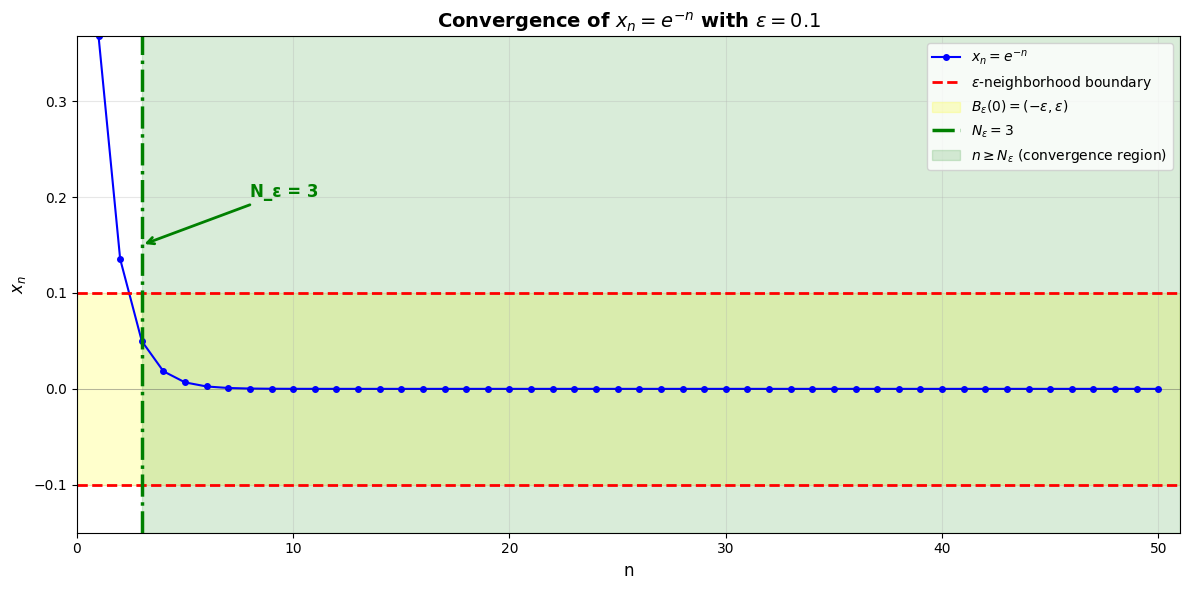


For ε = 0.1:
  N_ε = 3
  All terms x_n with n ≥ 3 lie inside (-0.1, 0.1)


In [6]:
# (b) Function to compute smallest N_ε
def find_N_epsilon(epsilon):
    """
    Find the smallest integer N_ε such that |x_n - 0| < ε for all n ≥ N_ε
    where x_n = e^(-n).

    We need: e^(-n) < ε
    Taking ln: -n < ln(ε)
    Therefore: n > -ln(ε)
    So: N_ε = ceil(-ln(ε))

    Parameters:
    -----------
    epsilon : float
        The tolerance value (ε > 0)

    Returns:
    --------
    int : The smallest N_ε
    """
    if epsilon <= 0:
        raise ValueError("epsilon must be positive")

    # Analytical solution: N_ε = ceil(-ln(ε))
    N_eps = int(np.ceil(-np.log(epsilon)))

    return N_eps

# Test the function
print("\n(b) Computing N_ε for different values of ε:")
print("-" * 40)
test_epsilons = [0.5, 0.1, 0.01, 0.001, 0.0001]
for eps in test_epsilons:
    N_eps = find_N_epsilon(eps)
    x_N = np.exp(-N_eps)
    print(f"  ε = {eps:7.4f} → N_ε = {N_eps:3d}, x_{N_eps} = {x_N:.6f}")

# (c), (d) Visualization function
def plot_convergence(epsilon, max_n=50):
    """
    Plot the sequence x_n = e^(-n) with ε-neighborhood and N_ε indicator.

    Parameters:
    -----------
    epsilon : float
        The tolerance value
    max_n : int
        Maximum n value to plot
    """
    # Compute N_ε
    N_eps = find_N_epsilon(epsilon)

    # Generate sequence
    n = np.arange(1, max_n + 1)
    x_n = np.exp(-n)

    # Create plot
    plt.figure(figsize=(12, 6))

    # Plot the sequence
    plt.plot(n, x_n, 'bo-', label=r'$x_n = e^{-n}$', markersize=4, linewidth=1.5)

    # Plot ε-neighborhood B_ε(0) = (-ε, ε)
    plt.axhline(y=epsilon, color='red', linestyle='--', linewidth=2,
                label=r'$\epsilon$-neighborhood boundary')
    plt.axhline(y=-epsilon, color='red', linestyle='--', linewidth=2)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

    # Fill the ε-neighborhood
    plt.fill_between([0, max_n + 1], -epsilon, epsilon, alpha=0.2, color='yellow',
                     label=r'$B_\epsilon(0) = (-\epsilon, \epsilon)$')

    # Mark N_ε with a vertical line
    plt.axvline(x=N_eps, color='green', linestyle='-.', linewidth=2.5,
                label=r'$N_\epsilon = $' + f'{N_eps}')

    # Highlight the region n ≥ N_ε
    plt.axvspan(N_eps, max_n + 1, alpha=0.15, color='green',
                label=r'$n \geq N_\epsilon$ (convergence region)')

    # Annotations
    plt.annotate(f'N_ε = {N_eps}', xy=(N_eps, epsilon * 1.5),
                xytext=(N_eps + 5, epsilon * 2),
                fontsize=12, color='green', fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='green', lw=2))

    plt.xlabel('n', fontsize=12)
    plt.ylabel(r'$x_n$', fontsize=12)
    plt.title(f'Convergence of $x_n = e^{{-n}}$ with $\epsilon = {epsilon}$',
              fontsize=14, fontweight='bold')
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, max_n + 1)
    plt.ylim(-epsilon * 1.5, max(x_n[0], epsilon * 3))

    plt.tight_layout()
    plt.show()

    print(f"\nFor ε = {epsilon}:")
    print(f"  N_ε = {N_eps}")
    print(f"  All terms x_n with n ≥ {N_eps} lie inside (-{epsilon}, {epsilon})")

# (c) and (d) Plot for a fixed ε
print("\n(c) & (d) Visualization with ε-neighborhood and N_ε:")
print("-" * 40)
plot_convergence(epsilon=0.1, max_n=50)



(e) Comparison of N_ε for different values of ε:
------------------------------------------------------------

Comparison Table:
ε          N_ε        Analytical: -ln(ε)       
------------------------------------------------------------
0.5000     1          0.693147                 
0.1000     3          2.302585                 
0.0100     5          4.605170                 

OBSERVATION:
As ε DECREASES (gets smaller):
  → N_ε INCREASES (gets larger)
  → We need MORE terms before the sequence enters the ε-neighborhood
  → Smaller tolerance requires more iterations to converge

Mathematical relationship: N_ε ≈ -ln(ε)
  - When ε is halved, N_ε increases by approximately ln(2) ≈ 0.693
  - When ε decreases by factor of 10, N_ε increases by ln(10) ≈ 2.303


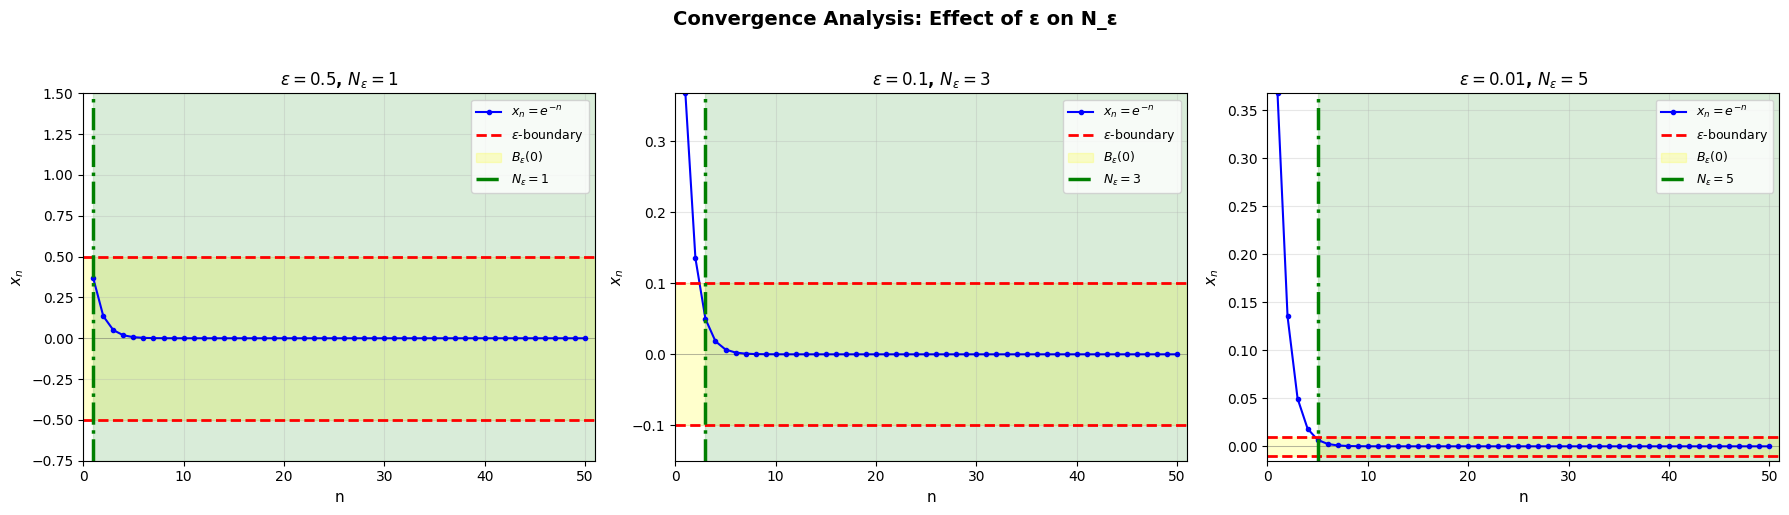

In [7]:
# (e) Compare multiple values of ε
print("\n(e) Comparison of N_ε for different values of ε:")
print("-" * 60)

epsilon_values = [0.5, 0.1, 0.01]

# Create comparison table
print("\nComparison Table:")
print(f"{'ε':<10} {'N_ε':<10} {'Analytical: -ln(ε)':<25}")
print("-" * 60)
for eps in epsilon_values:
    N_eps = find_N_epsilon(eps)
    analytical = -np.log(eps)
    print(f"{eps:<10.4f} {N_eps:<10d} {analytical:<25.6f}")

print("\n" + "="*60)
print("OBSERVATION:")
print("="*60)
print("As ε DECREASES (gets smaller):")
print("  → N_ε INCREASES (gets larger)")
print("  → We need MORE terms before the sequence enters the ε-neighborhood")
print("  → Smaller tolerance requires more iterations to converge")
print("\nMathematical relationship: N_ε ≈ -ln(ε)")
print("  - When ε is halved, N_ε increases by approximately ln(2) ≈ 0.693")
print("  - When ε decreases by factor of 10, N_ε increases by ln(10) ≈ 2.303")
print("="*60)

# Plot all three together for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, eps in enumerate(epsilon_values):
    ax = axes[idx]
    N_eps = find_N_epsilon(eps)

    # Generate sequence
    max_n = max(50, N_eps + 10)
    n = np.arange(1, max_n + 1)
    x_n = np.exp(-n)

    # Plot the sequence
    ax.plot(n, x_n, 'bo-', label=r'$x_n = e^{-n}$', markersize=3, linewidth=1.5)

    # Plot ε-neighborhood
    ax.axhline(y=eps, color='red', linestyle='--', linewidth=2,
               label=r'$\epsilon$-boundary')
    ax.axhline(y=-eps, color='red', linestyle='--', linewidth=2)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

    # Fill the ε-neighborhood
    ax.fill_between([0, max_n + 1], -eps, eps, alpha=0.2, color='yellow',
                    label=r'$B_\epsilon(0)$')

    # Mark N_ε
    ax.axvline(x=N_eps, color='green', linestyle='-.', linewidth=2.5,
               label=r'$N_\epsilon = $' + f'{N_eps}')

    # Highlight convergence region
    ax.axvspan(N_eps, max_n + 1, alpha=0.15, color='green')

    ax.set_xlabel('n', fontsize=11)
    ax.set_ylabel(r'$x_n$', fontsize=11)
    ax.set_title(f'$\epsilon = {eps}$, $N_\epsilon = {N_eps}$',
                fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, max_n + 1)
    ax.set_ylim(-eps * 1.5, max(x_n[0], eps * 3))

plt.suptitle('Convergence Analysis: Effect of ε on N_ε',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()
